In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
def fit_linear_regression(series):
    try:
        train_size = int(len(series) * 0.8)
        train, test = series[:train_size], series[train_size:]
        if len(test) < 2:
            print("Test series must contain at least 2 values.")
            return None, None
        
        X_train = np.arange(len(train)).reshape(-1, 1)
        y_train = train.values.reshape(-1, 1)
        
        X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        predictions = model.predict(X_test).flatten()
        
        rmse = np.sqrt(mean_squared_error(test, predictions))
        return predictions, rmse
    except Exception as e:
        print("An error occurred:", e)
        return None, None

In [3]:
def plot_forecast(actual, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(actual.index, actual, label='Actual')
    plt.plot(actual.index[-len(predictions):], predictions, label='Predicted')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [4]:
base_dir = '../../Datasets/Import'

Processing data in folder: Country-Wise-Time-Series...


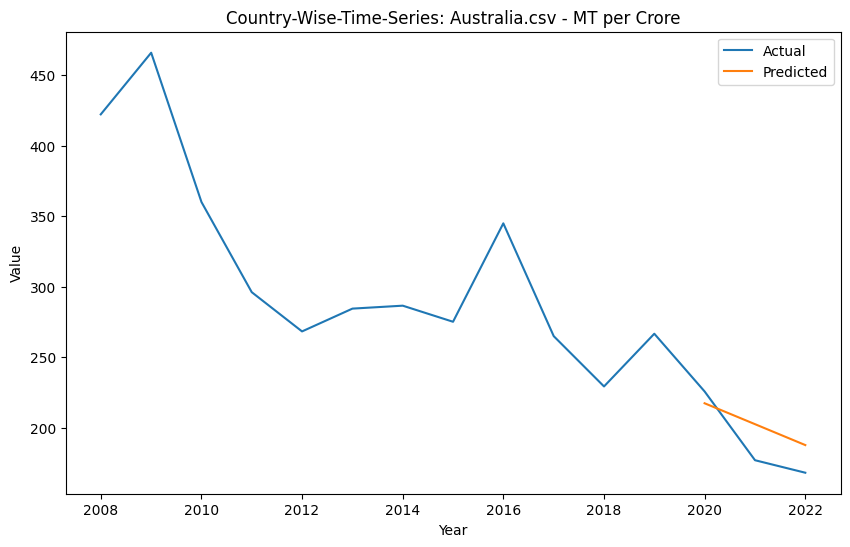

Country-Wise-Time-Series: Australia.csv - MT per Crore RMSE: 19.195573981979848


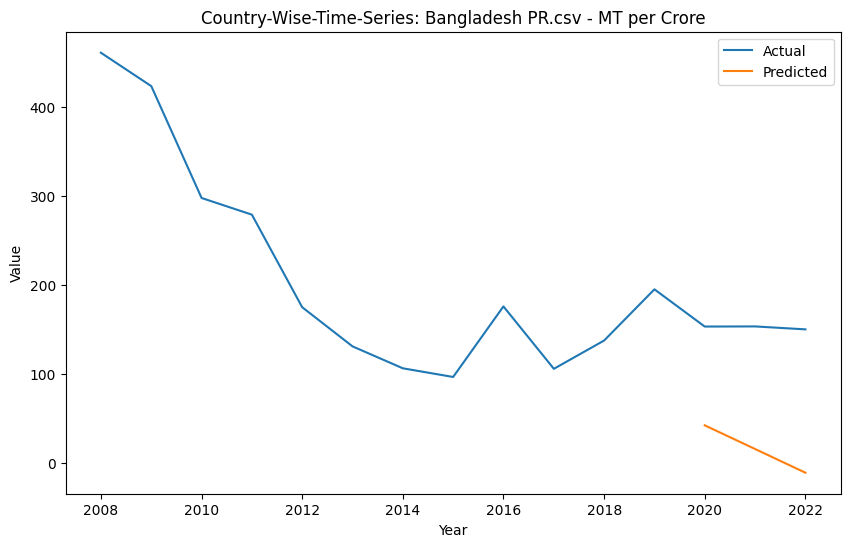

Country-Wise-Time-Series: Bangladesh PR.csv - MT per Crore RMSE: 138.05456398475746


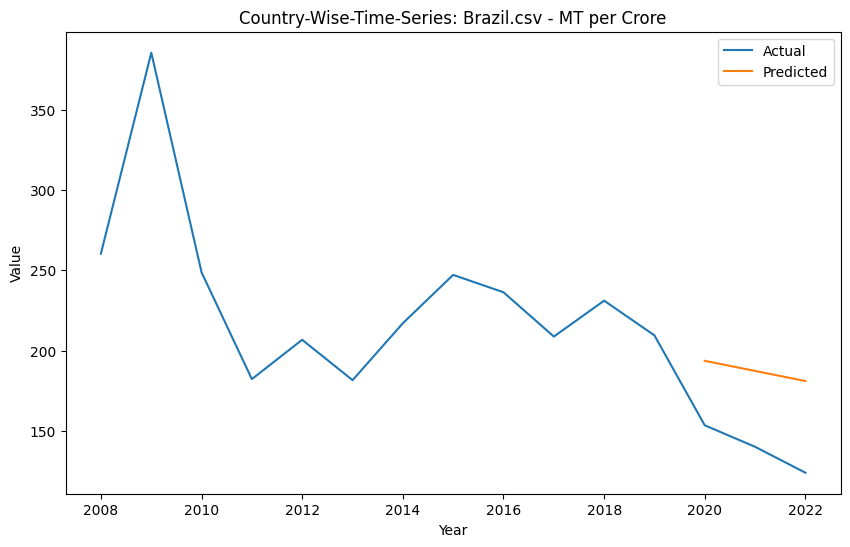

Country-Wise-Time-Series: Brazil.csv - MT per Crore RMSE: 48.614721572977025


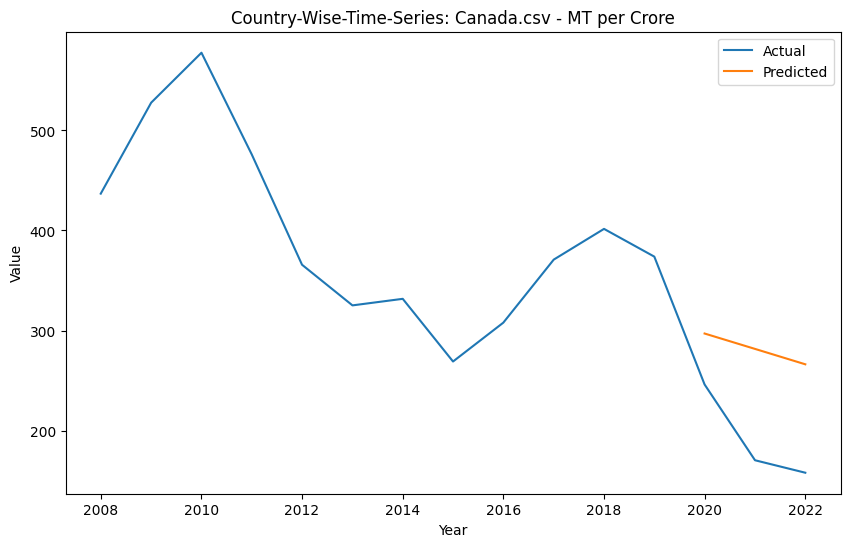

Country-Wise-Time-Series: Canada.csv - MT per Crore RMSE: 94.35564252283889


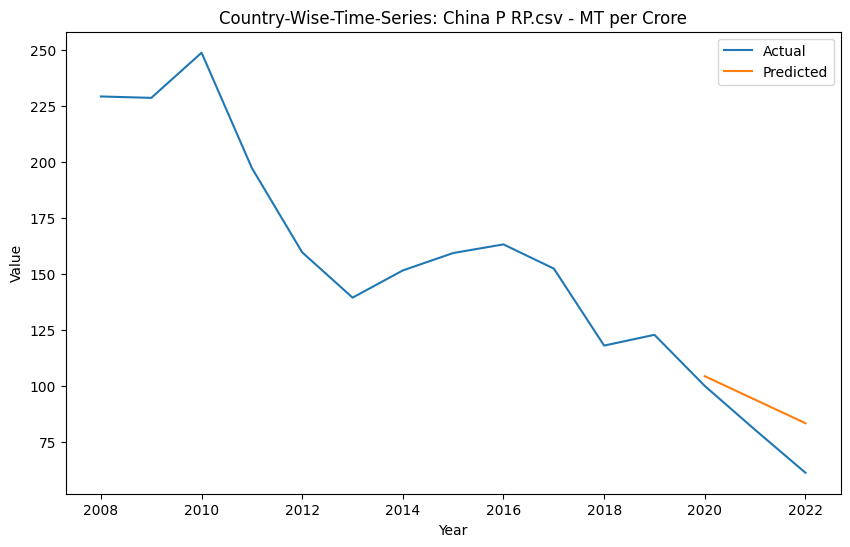

Country-Wise-Time-Series: China P RP.csv - MT per Crore RMSE: 15.149889528316113


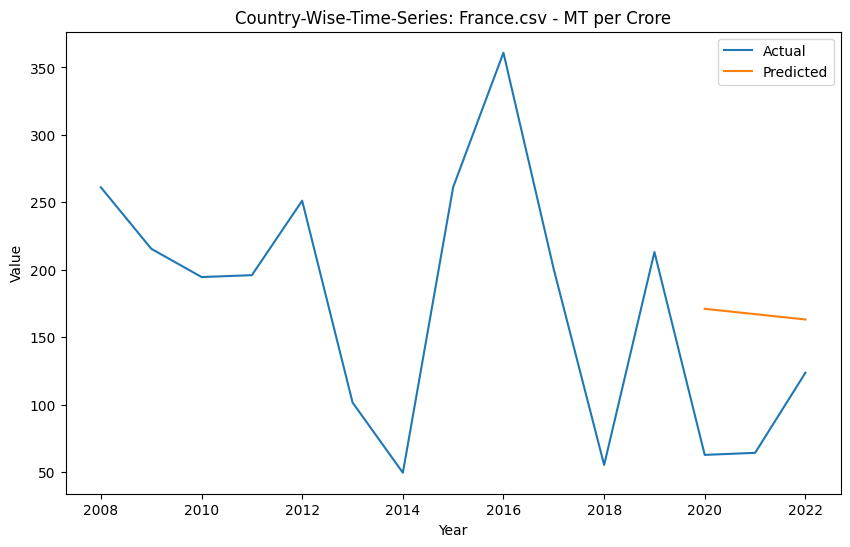

Country-Wise-Time-Series: France.csv - MT per Crore RMSE: 89.18837539817481


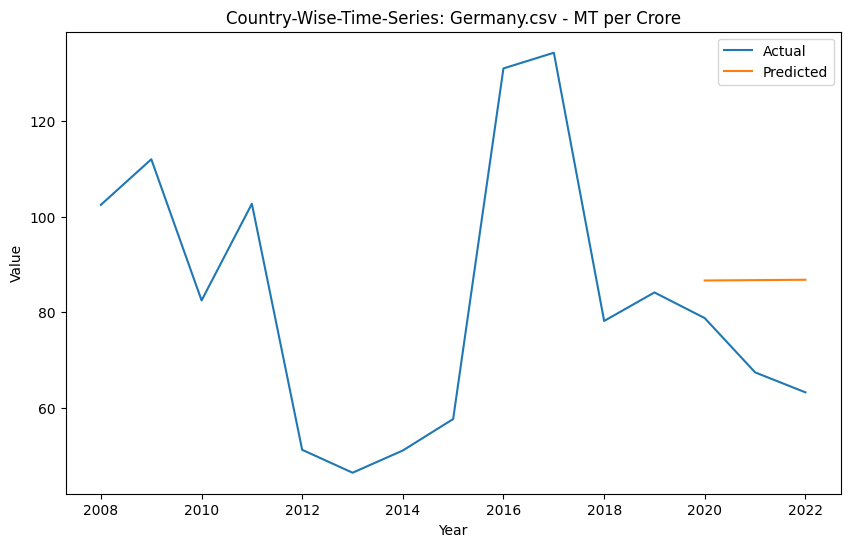

Country-Wise-Time-Series: Germany.csv - MT per Crore RMSE: 18.176325655322344


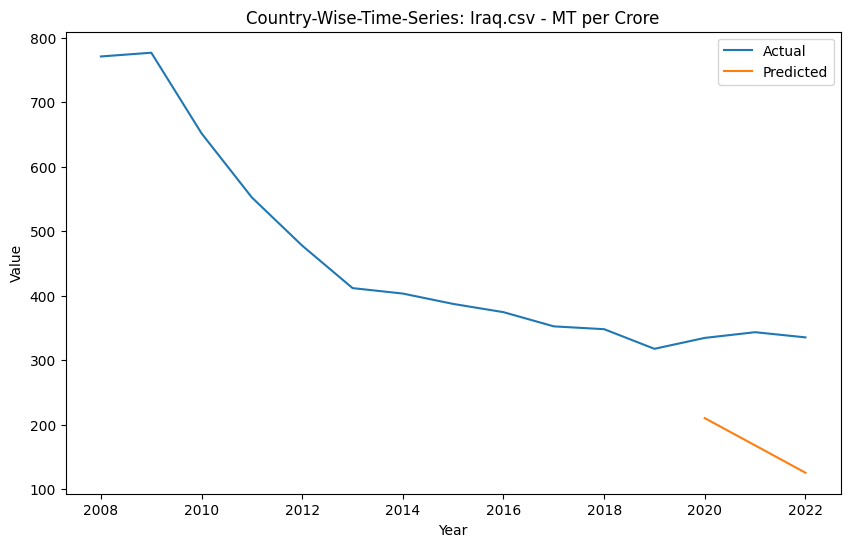

Country-Wise-Time-Series: Iraq.csv - MT per Crore RMSE: 173.5760945858246


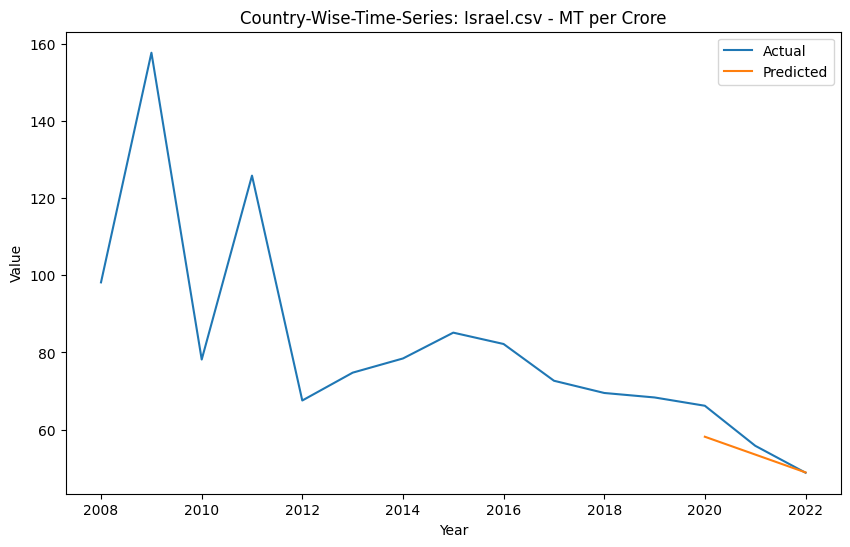

Country-Wise-Time-Series: Israel.csv - MT per Crore RMSE: 4.819380742817094


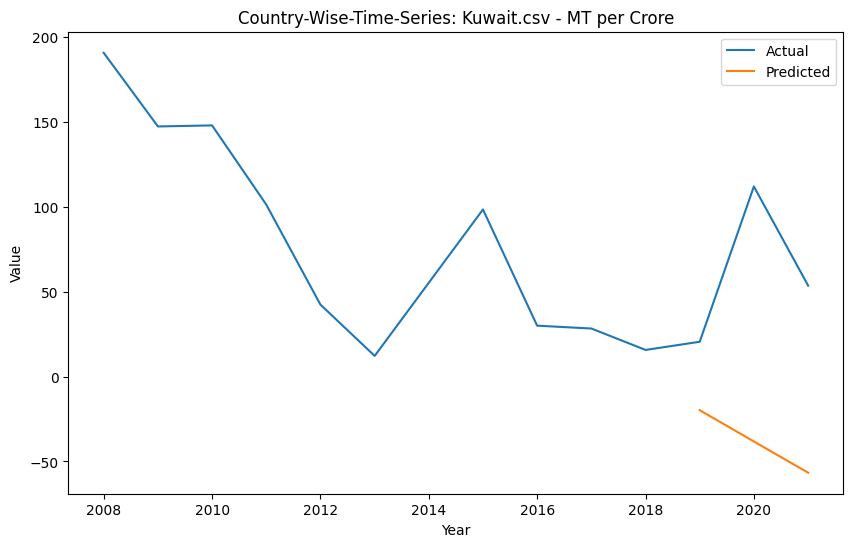

Country-Wise-Time-Series: Kuwait.csv - MT per Crore RMSE: 110.04012770432968


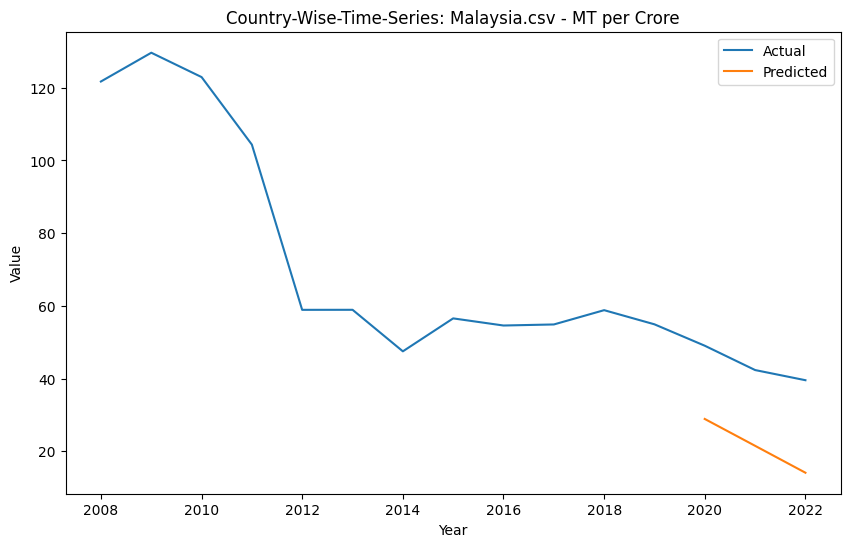

Country-Wise-Time-Series: Malaysia.csv - MT per Crore RMSE: 22.26203806526263


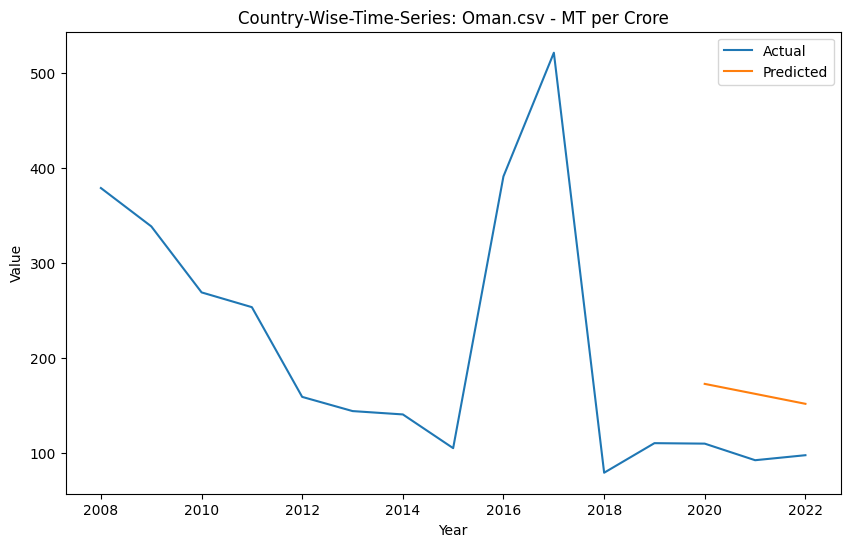

Country-Wise-Time-Series: Oman.csv - MT per Crore RMSE: 62.57481052424906


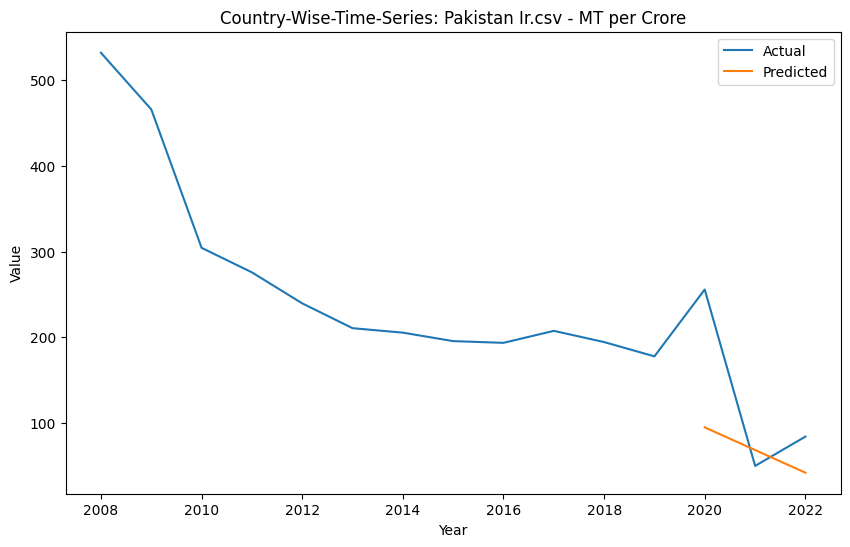

Country-Wise-Time-Series: Pakistan Ir.csv - MT per Crore RMSE: 96.48697290918486


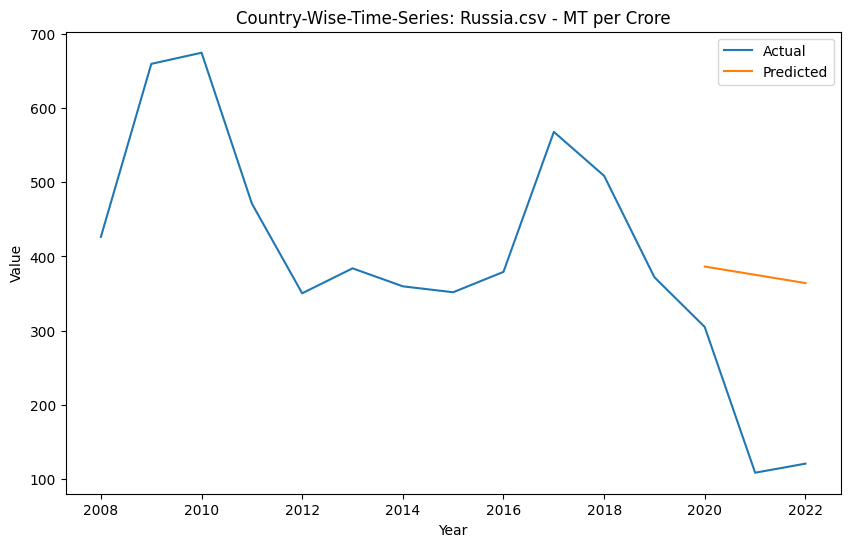

Country-Wise-Time-Series: Russia.csv - MT per Crore RMSE: 213.4816142589448


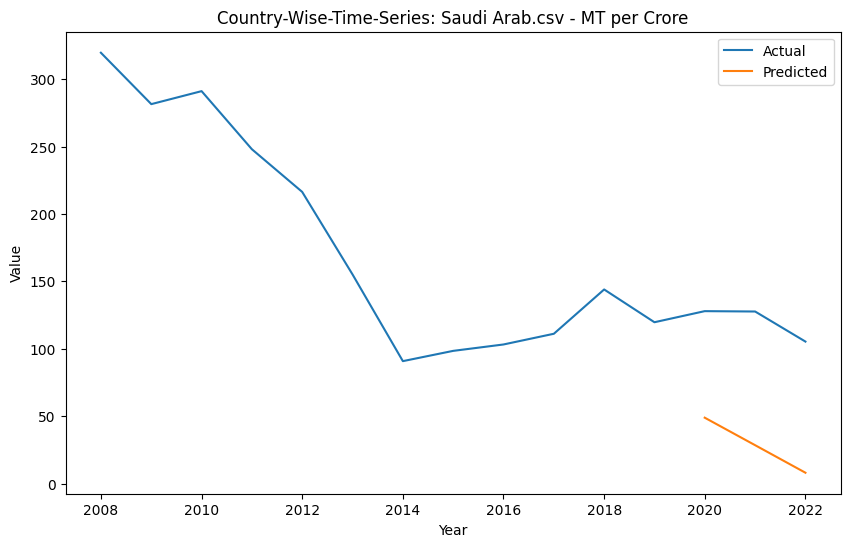

Country-Wise-Time-Series: Saudi Arab.csv - MT per Crore RMSE: 92.31125014577577


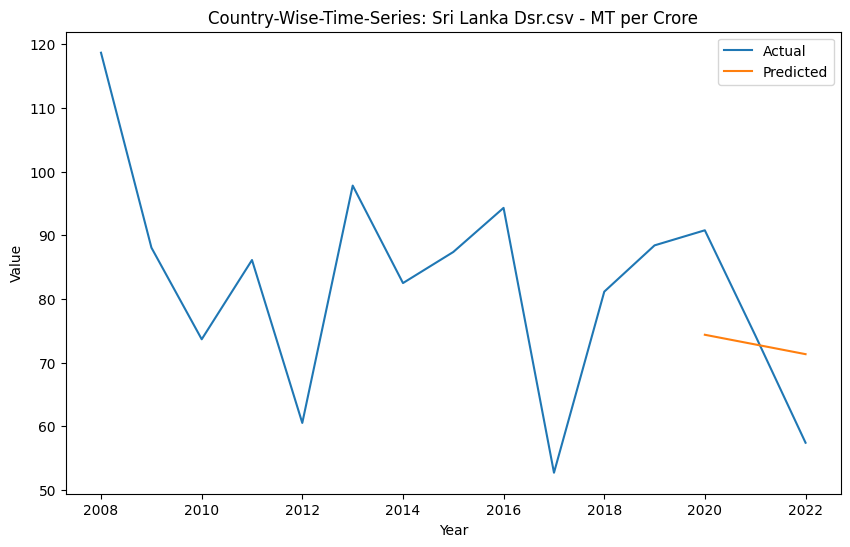

Country-Wise-Time-Series: Sri Lanka Dsr.csv - MT per Crore RMSE: 12.449232173732131


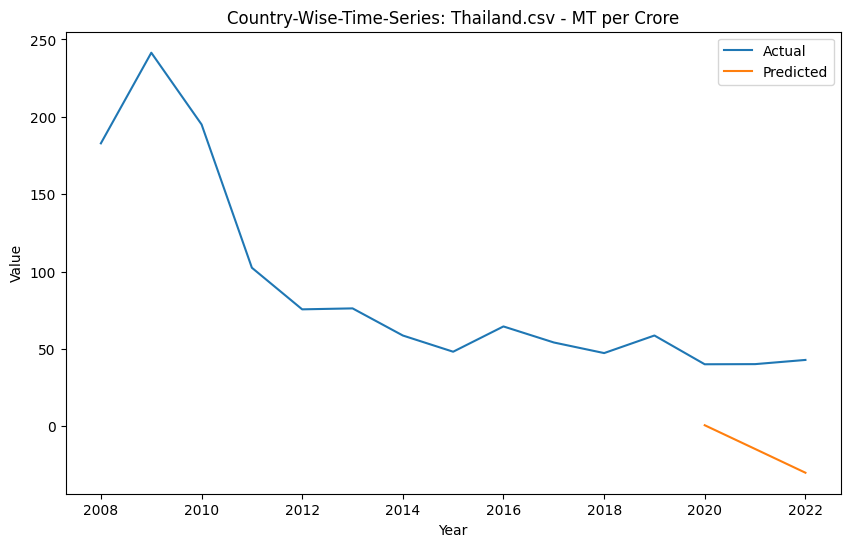

Country-Wise-Time-Series: Thailand.csv - MT per Crore RMSE: 57.37763304245653


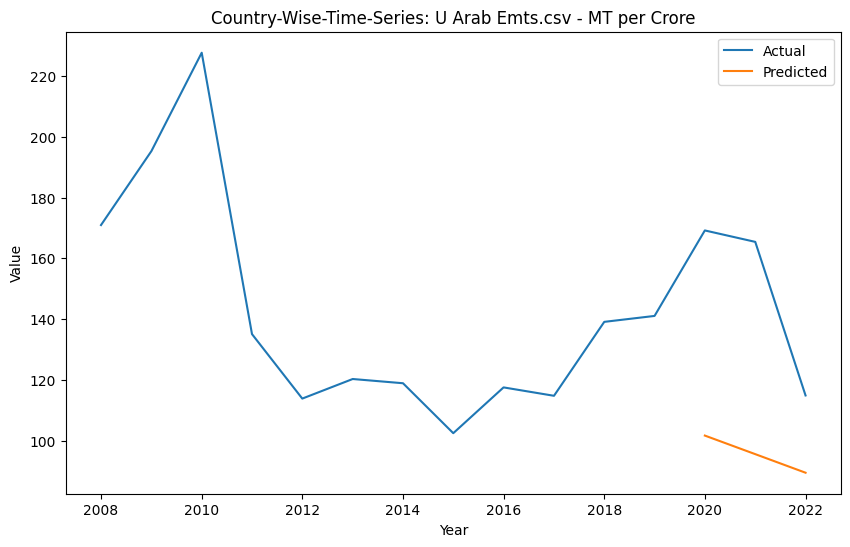

Country-Wise-Time-Series: U Arab Emts.csv - MT per Crore RMSE: 57.949533453948334


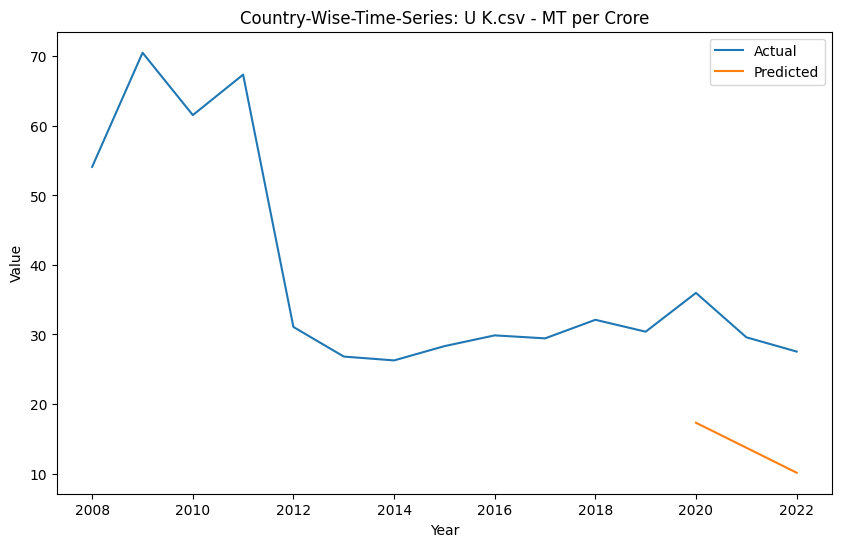

Country-Wise-Time-Series: U K.csv - MT per Crore RMSE: 17.36489473315938


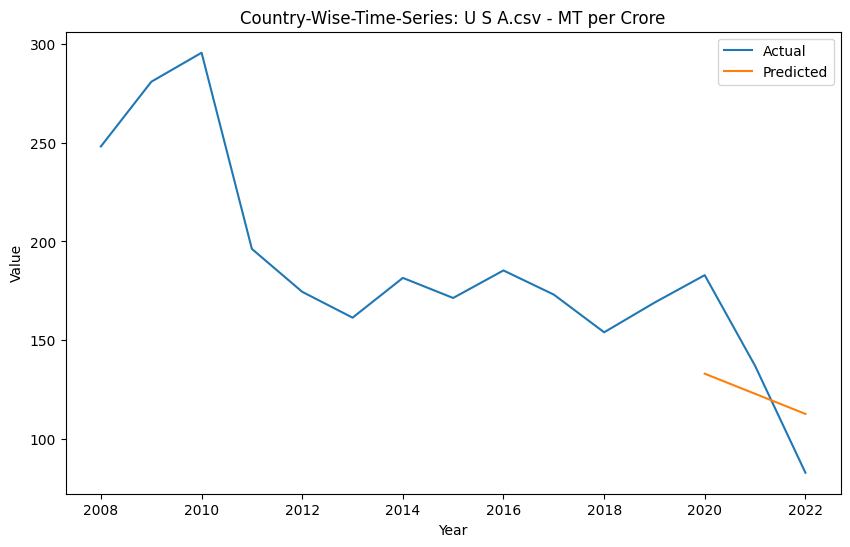

Country-Wise-Time-Series: U S A.csv - MT per Crore RMSE: 34.57583578175594


In [5]:
# Export Prediction Country Wise

folders_to_process = ['Country-Wise-Time-Series']

for folder_name in folders_to_process:
    folder_path = os.path.join(base_dir, folder_name)
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_name}' does not exist.")
        continue
    
    print(f"Processing data in folder: {folder_name}...")
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        if 'Year' in df.columns:
            if df['Year'].iloc[-1] == 'Total':
                df = df.iloc[:-1]
                df = df.iloc[:-1]
            # Handle cases where 'Year' column contains more than just the year
            df['Year'] = df['Year'].str.extract('(\d{4})', expand=False)
            df['Year'] = pd.to_datetime(df['Year'], format='%Y')
            df.set_index('Year', inplace=True)
        df = df[df["MT per Crore"] != 0]
        
        for column in df.columns:
            if column not in ['Year', '% Share(Qty)', '% Share(Rs)', 'Qty(MT)', 'Rs(Crore)']:
                predictions, rmse = fit_linear_regression(df[column])
                if predictions is not None:
                    plot_forecast(df[column], predictions, f"{folder_name}: {file_name} - {column}")
                    print(f"{folder_name}: {file_name} - {column} RMSE: {rmse}")
                else:
                    print(f"{folder_name}: {file_name} - {column} not enough data for Linear Regression model")


Processing data in folder: Product-Wise-Time-Series...


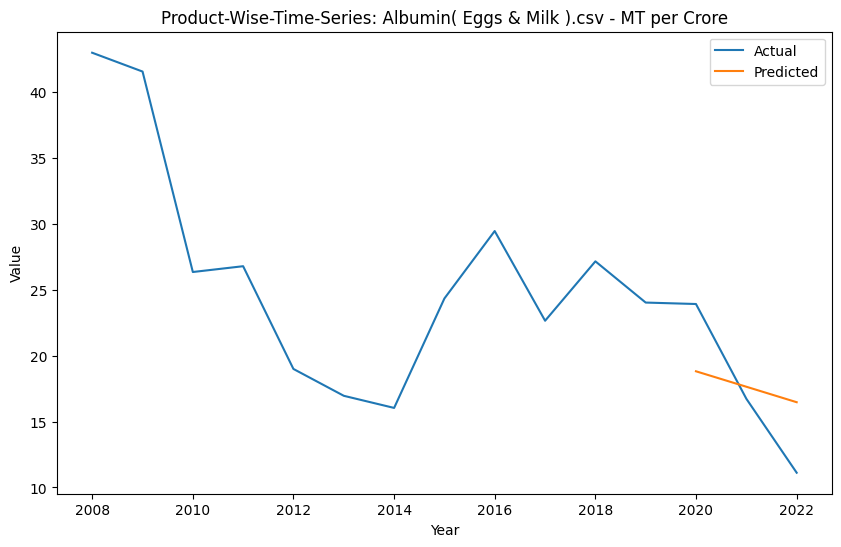

Product-Wise-Time-Series: Albumin( Eggs & Milk ).csv - MT per Crore RMSE: 4.3049712609157575
Test series must contain at least 2 values.
Product-Wise-Time-Series: Albumin( Eggs & Milk).csv - MT per Crore not enough data for Linear Regression model


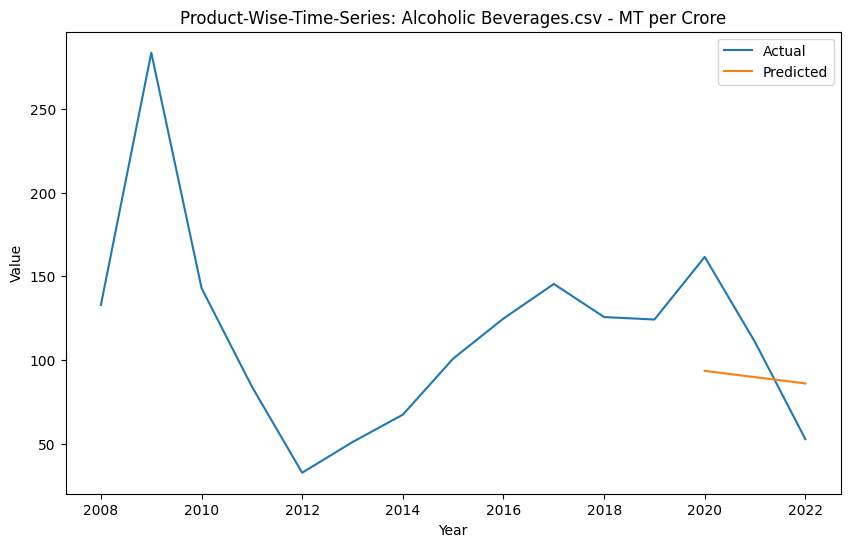

Product-Wise-Time-Series: Alcoholic Beverages.csv - MT per Crore RMSE: 45.3689224983798
Test series must contain at least 2 values.
Product-Wise-Time-Series: Animal Casings.csv - MT per Crore not enough data for Linear Regression model


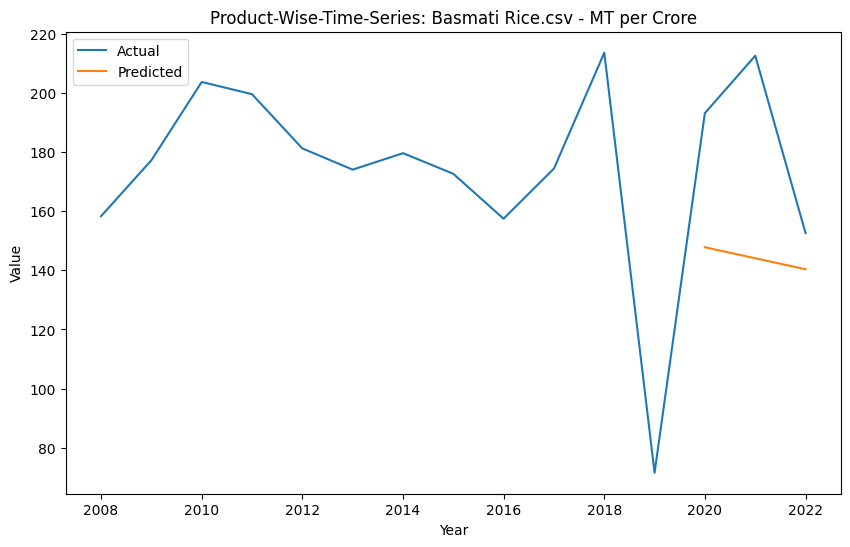

Product-Wise-Time-Series: Basmati Rice.csv - MT per Crore RMSE: 47.90170754349253
Test series must contain at least 2 values.
Product-Wise-Time-Series: Buffalo Meat.csv - MT per Crore not enough data for Linear Regression model


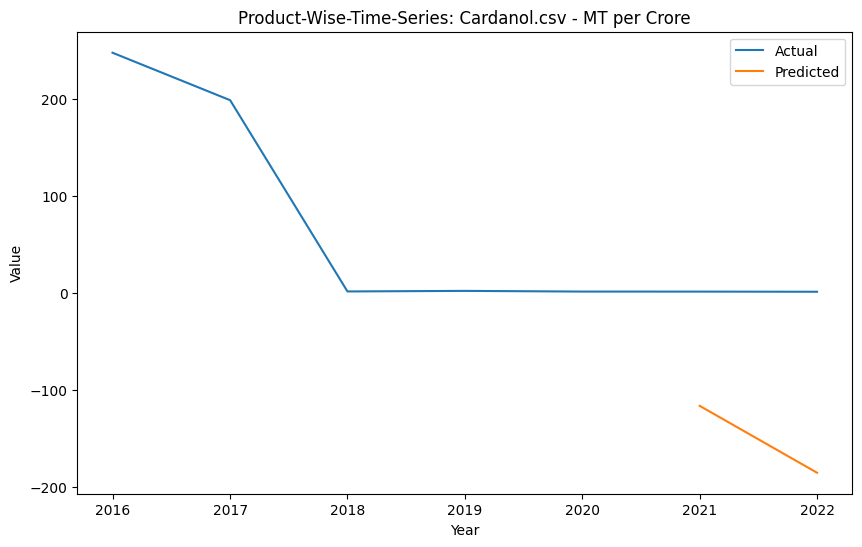

Product-Wise-Time-Series: Cardanol.csv - MT per Crore RMSE: 156.11775927164726


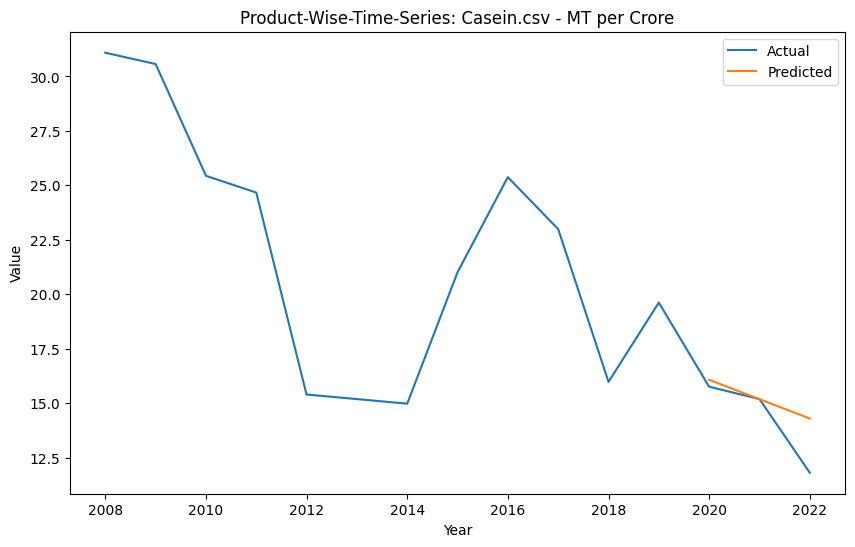

Product-Wise-Time-Series: Casein.csv - MT per Crore RMSE: 1.447691221544127


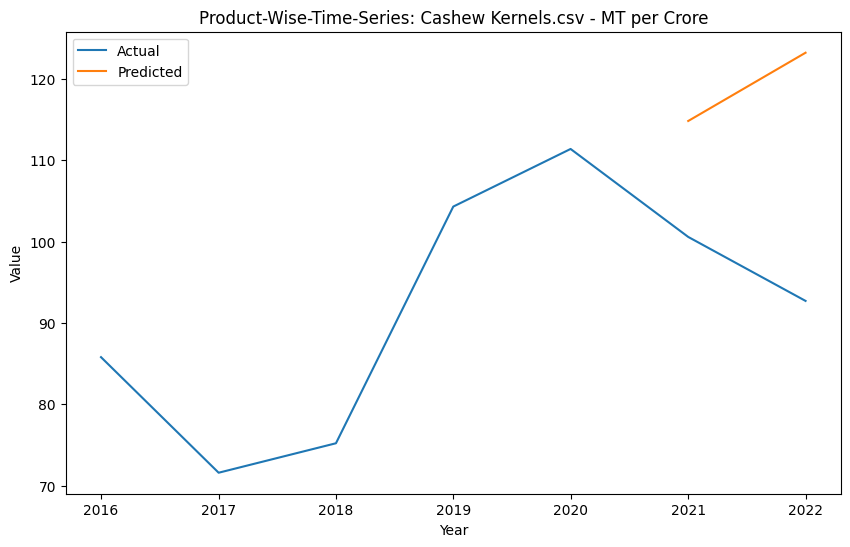

Product-Wise-Time-Series: Cashew Kernels.csv - MT per Crore RMSE: 23.80010020987308


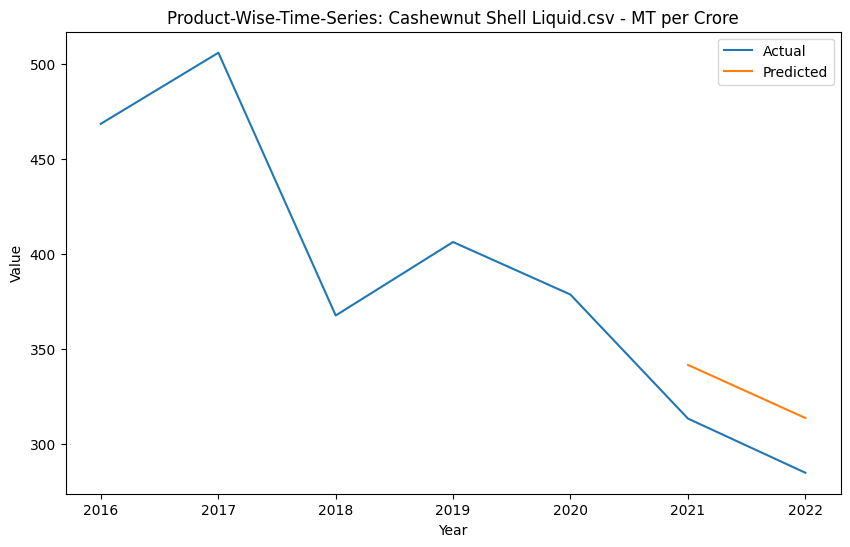

Product-Wise-Time-Series: Cashewnut Shell Liquid.csv - MT per Crore RMSE: 28.533393559126424


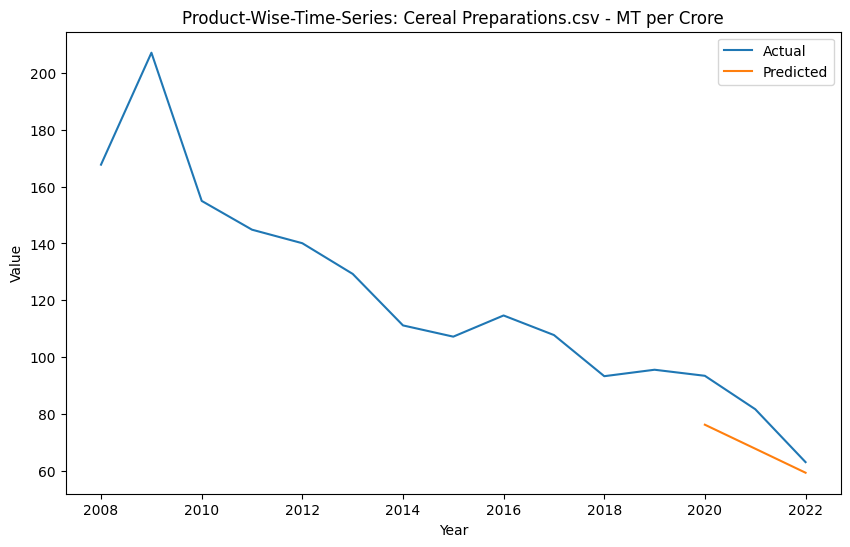

Product-Wise-Time-Series: Cereal Preparations.csv - MT per Crore RMSE: 12.946406016681111


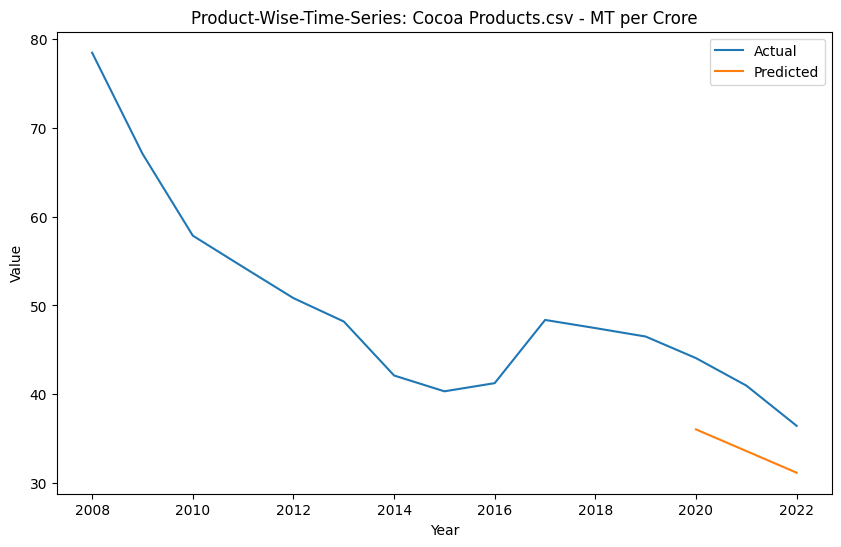

Product-Wise-Time-Series: Cocoa Products.csv - MT per Crore RMSE: 6.992465364980396


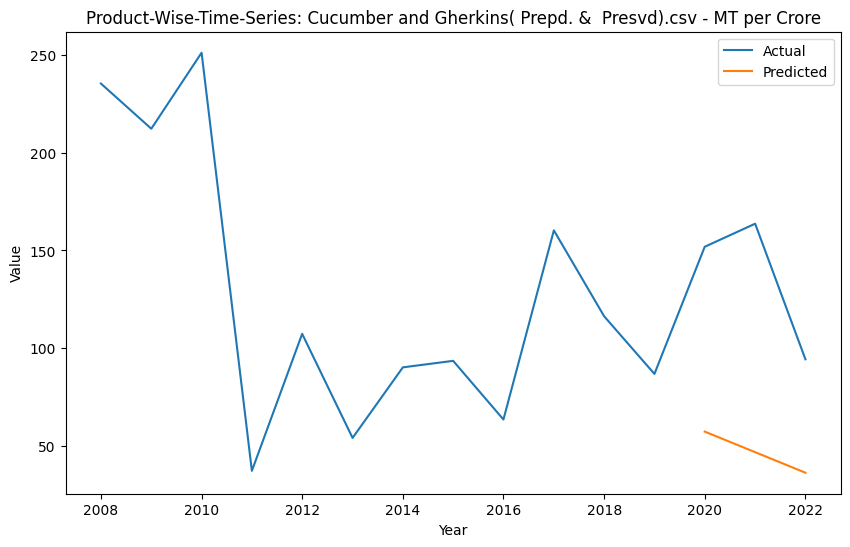

Product-Wise-Time-Series: Cucumber and Gherkins( Prepd. &  Presvd).csv - MT per Crore RMSE: 92.94311480026036


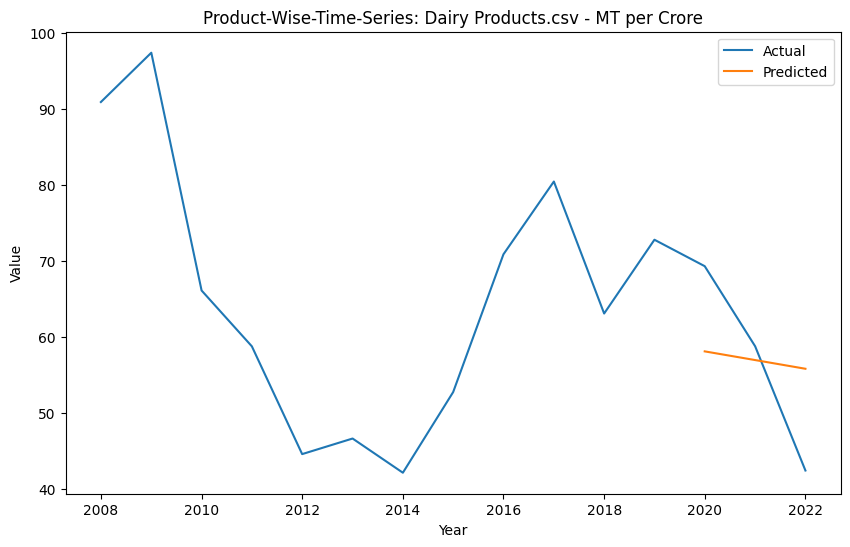

Product-Wise-Time-Series: Dairy Products.csv - MT per Crore RMSE: 10.137080231606891


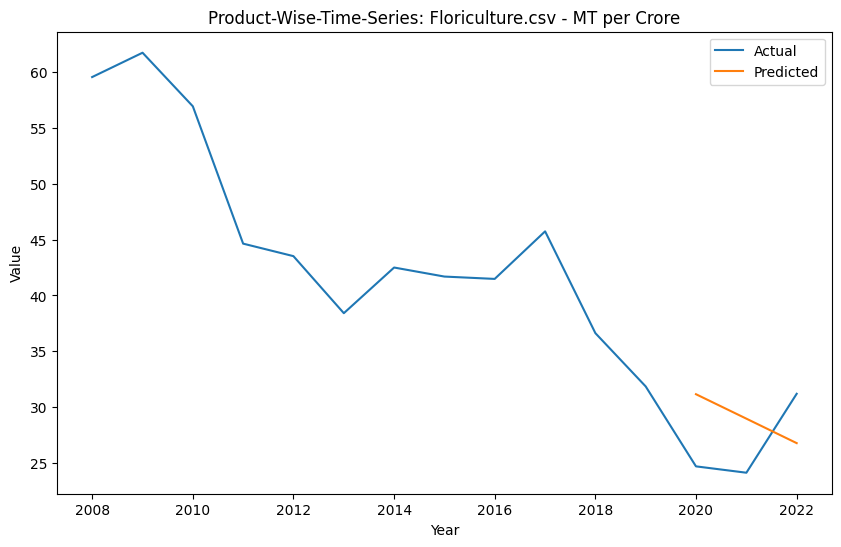

Product-Wise-Time-Series: Floriculture.csv - MT per Crore RMSE: 5.314482250023526


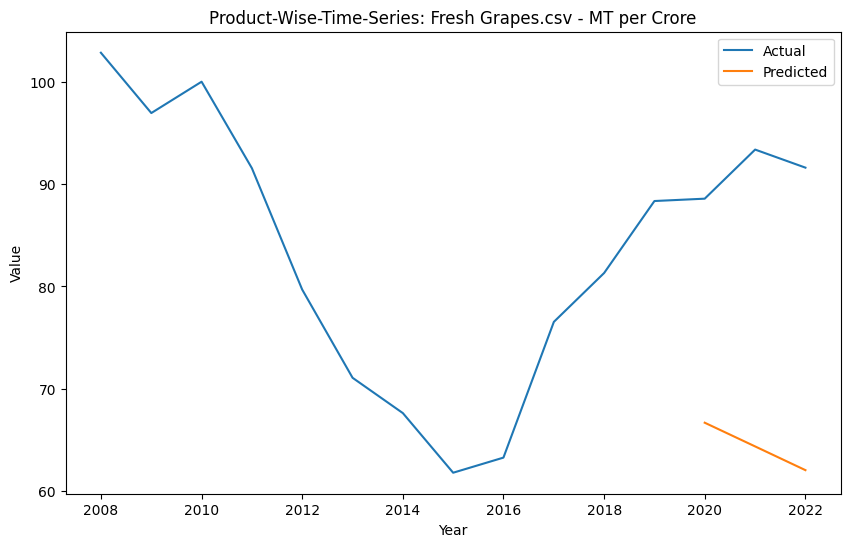

Product-Wise-Time-Series: Fresh Grapes.csv - MT per Crore RMSE: 27.1173597196935
An error occurred: Input y contains infinity or a value too large for dtype('float64').
Product-Wise-Time-Series: Fresh Mangoes.csv - MT per Crore not enough data for Linear Regression model


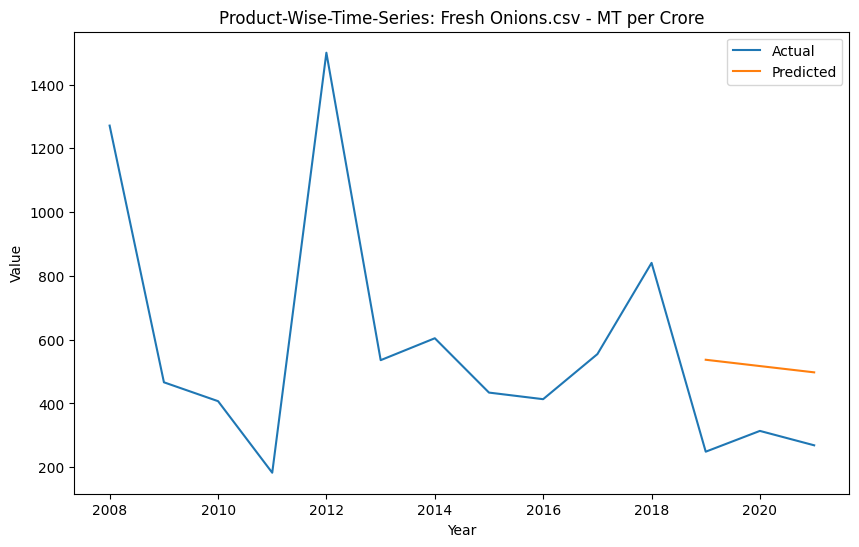

Product-Wise-Time-Series: Fresh Onions.csv - MT per Crore RMSE: 242.78120408764744


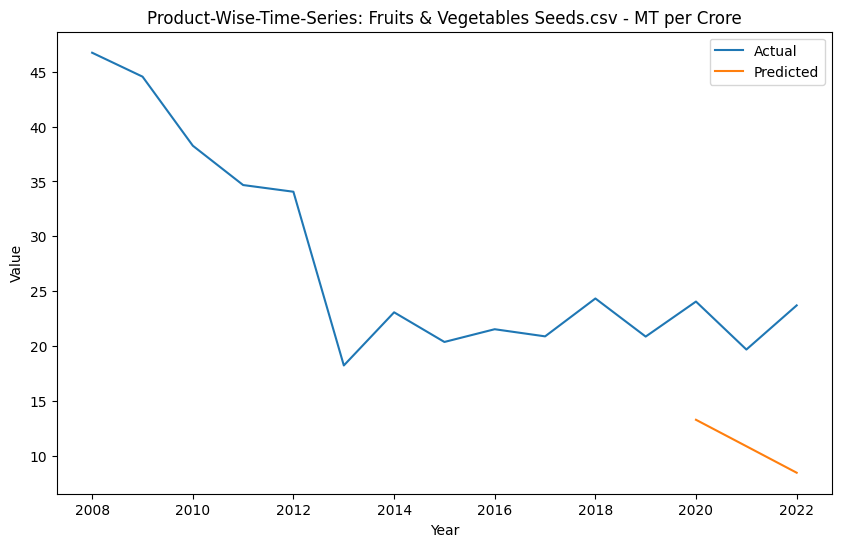

Product-Wise-Time-Series: Fruits & Vegetables Seeds.csv - MT per Crore RMSE: 11.91152351687696


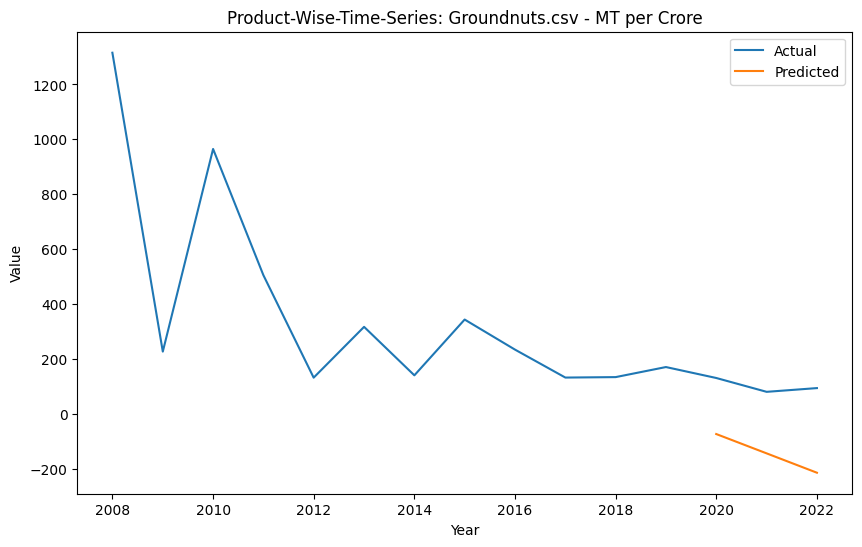

Product-Wise-Time-Series: Groundnuts.csv - MT per Crore RMSE: 249.76689076610685


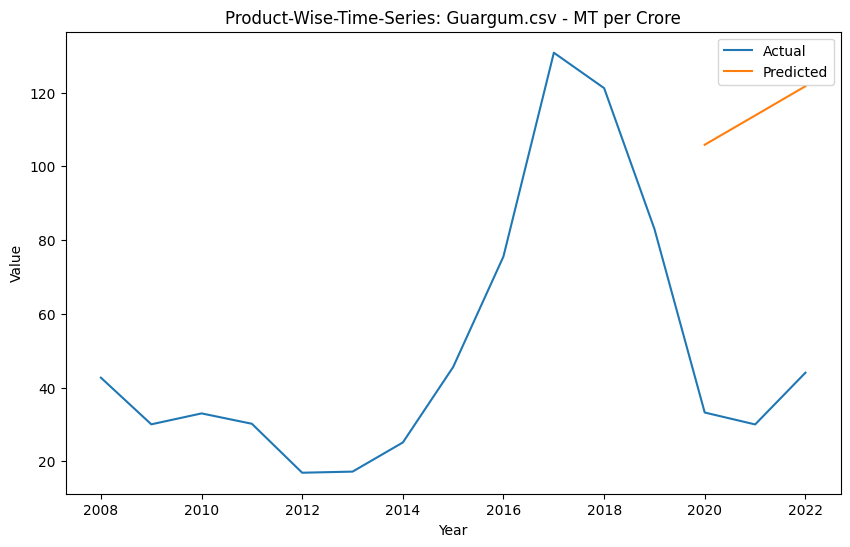

Product-Wise-Time-Series: Guargum.csv - MT per Crore RMSE: 78.18566485705969


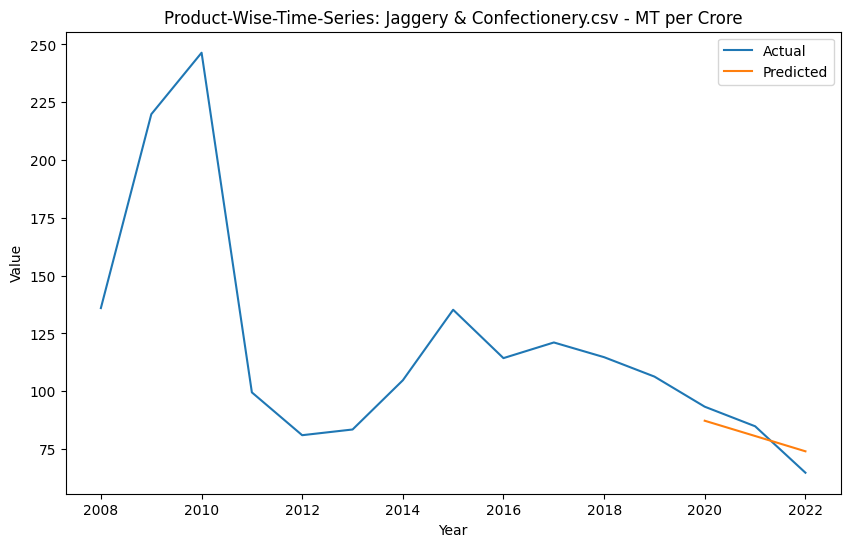

Product-Wise-Time-Series: Jaggery & Confectionery.csv - MT per Crore RMSE: 6.842382256072836


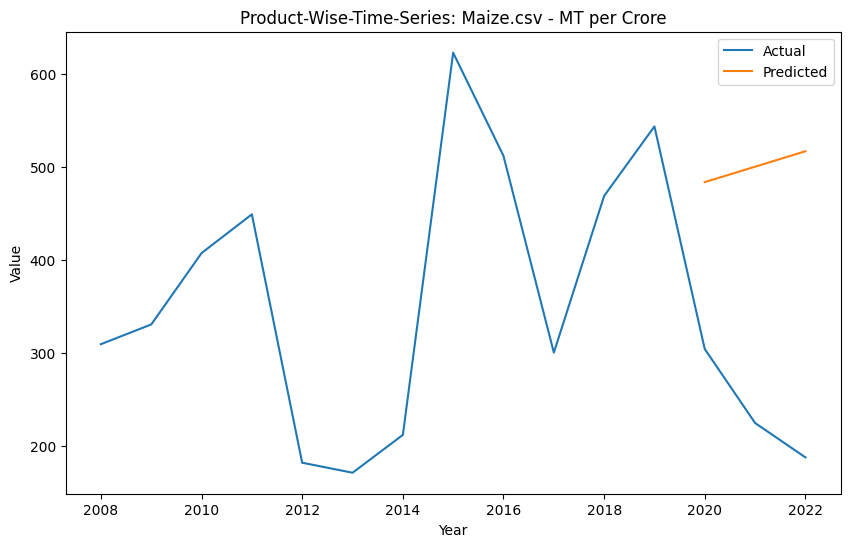

Product-Wise-Time-Series: Maize.csv - MT per Crore RMSE: 268.4639667162056


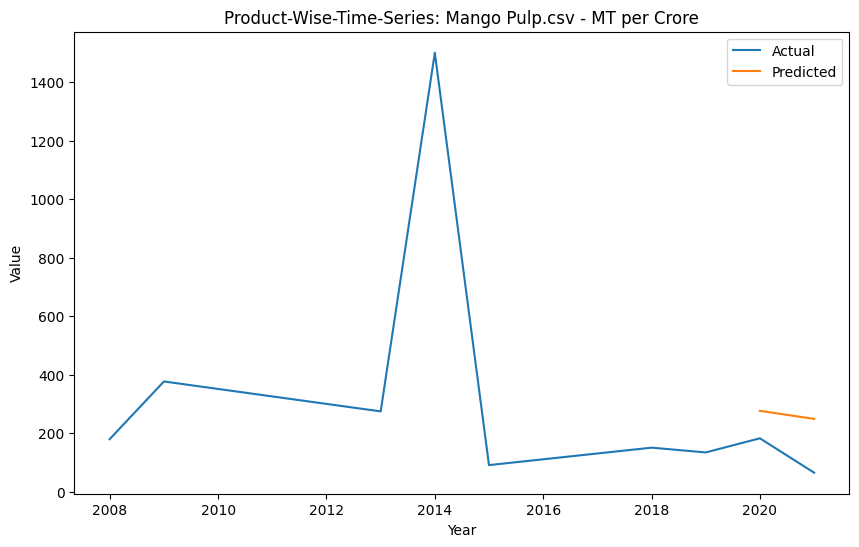

Product-Wise-Time-Series: Mango Pulp.csv - MT per Crore RMSE: 145.96739759192005


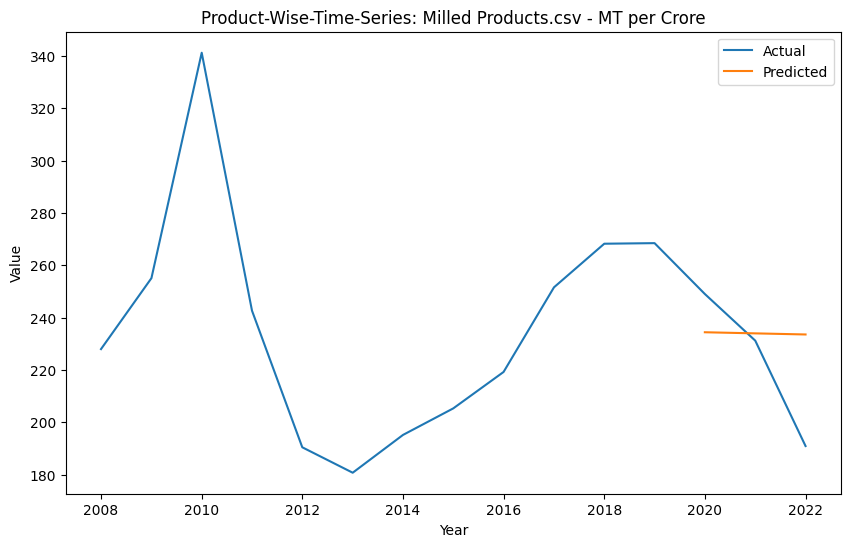

Product-Wise-Time-Series: Milled Products.csv - MT per Crore RMSE: 26.082726276240866


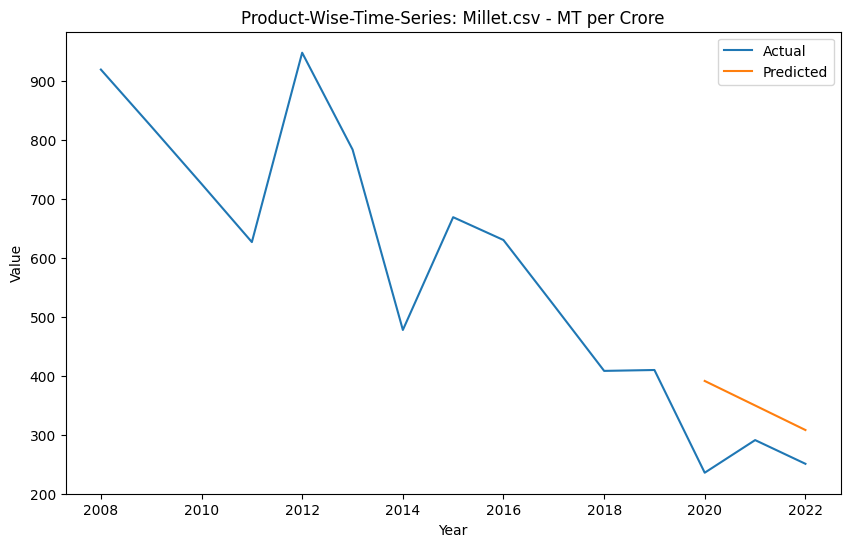

Product-Wise-Time-Series: Millet.csv - MT per Crore RMSE: 101.52848827489065


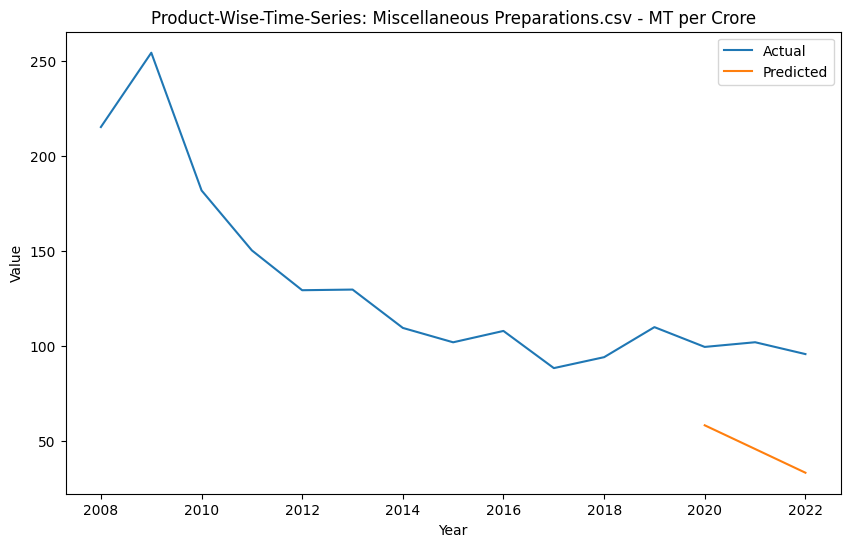

Product-Wise-Time-Series: Miscellaneous Preparations.csv - MT per Crore RMSE: 54.005686766106344


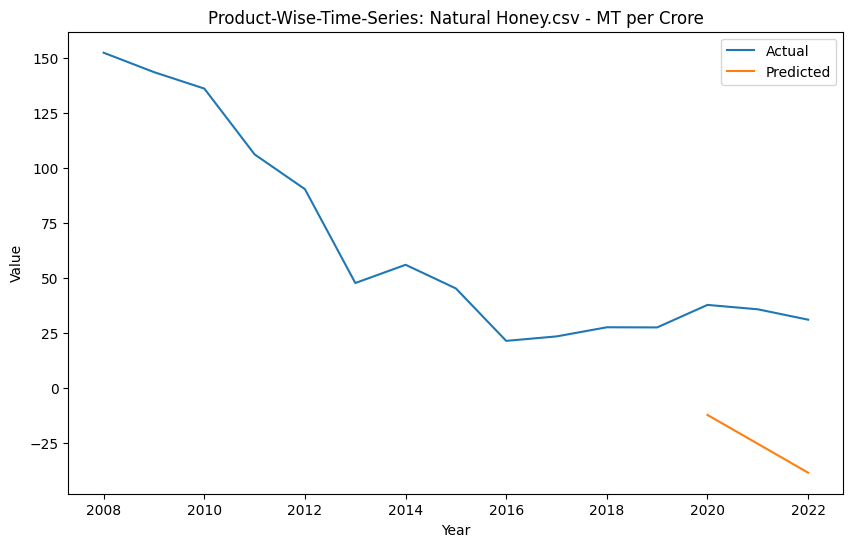

Product-Wise-Time-Series: Natural Honey.csv - MT per Crore RMSE: 60.65659133400194


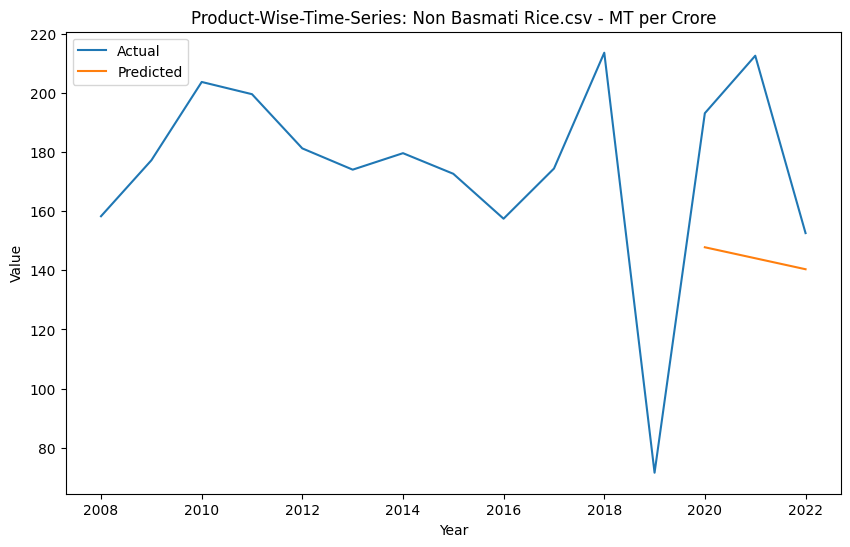

Product-Wise-Time-Series: Non Basmati Rice.csv - MT per Crore RMSE: 47.90170754349253


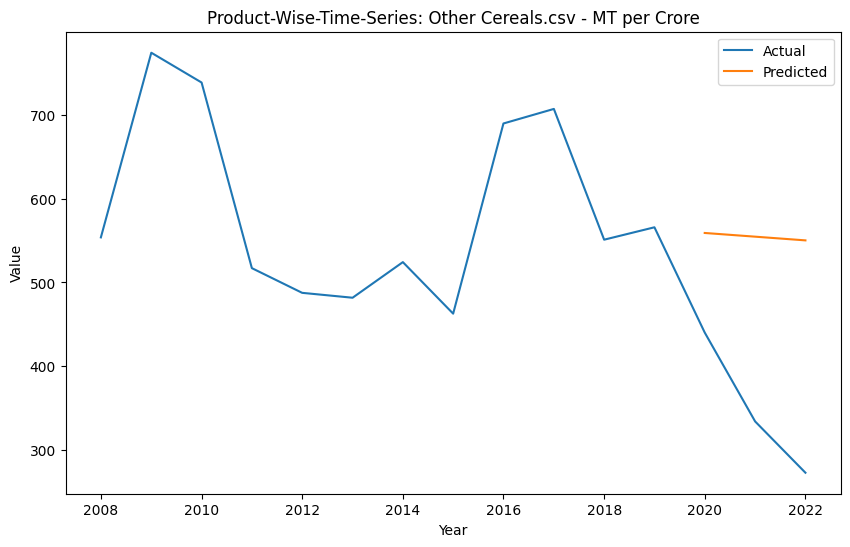

Product-Wise-Time-Series: Other Cereals.csv - MT per Crore RMSE: 216.1213508416446


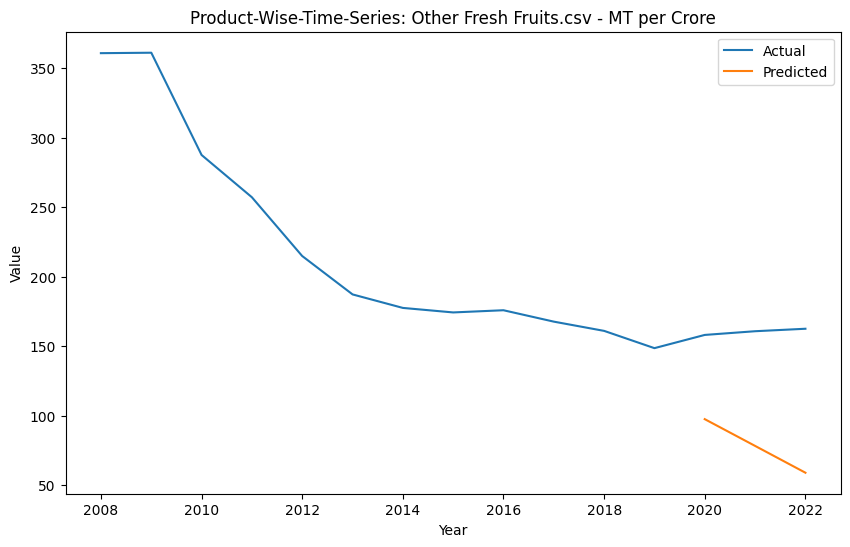

Product-Wise-Time-Series: Other Fresh Fruits.csv - MT per Crore RMSE: 84.10084314149071


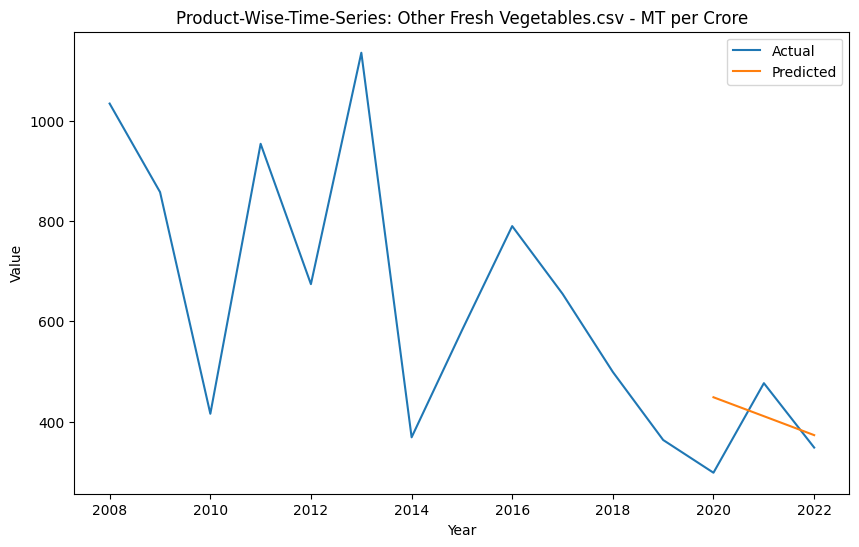

Product-Wise-Time-Series: Other Fresh Vegetables.csv - MT per Crore RMSE: 95.83777423843155


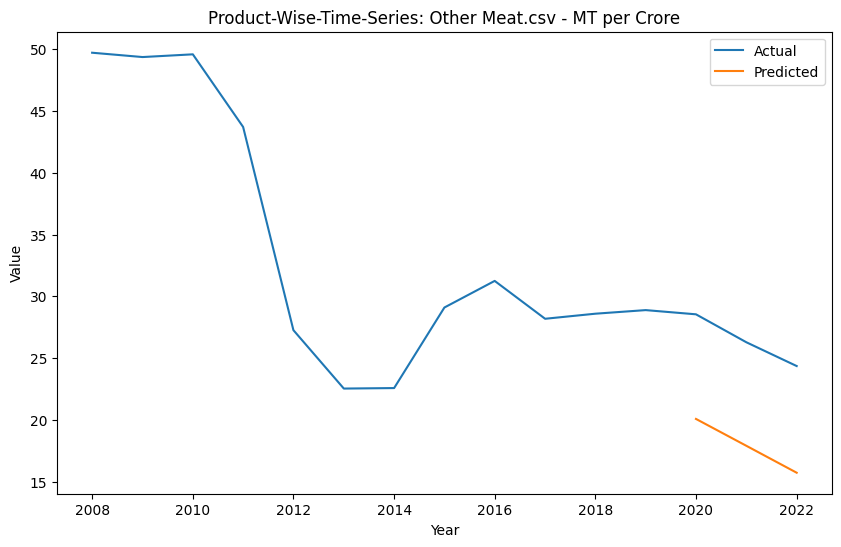

Product-Wise-Time-Series: Other Meat.csv - MT per Crore RMSE: 8.48116776783211
Test series must contain at least 2 values.
Product-Wise-Time-Series: Other Oil Cake or Solid Resdus.csv - MT per Crore not enough data for Linear Regression model


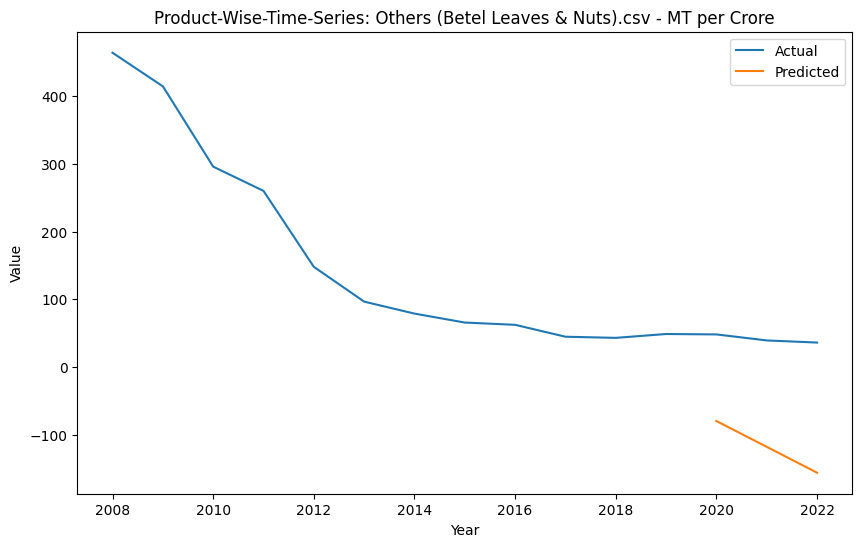

Product-Wise-Time-Series: Others (Betel Leaves & Nuts).csv - MT per Crore RMSE: 161.34328282351984


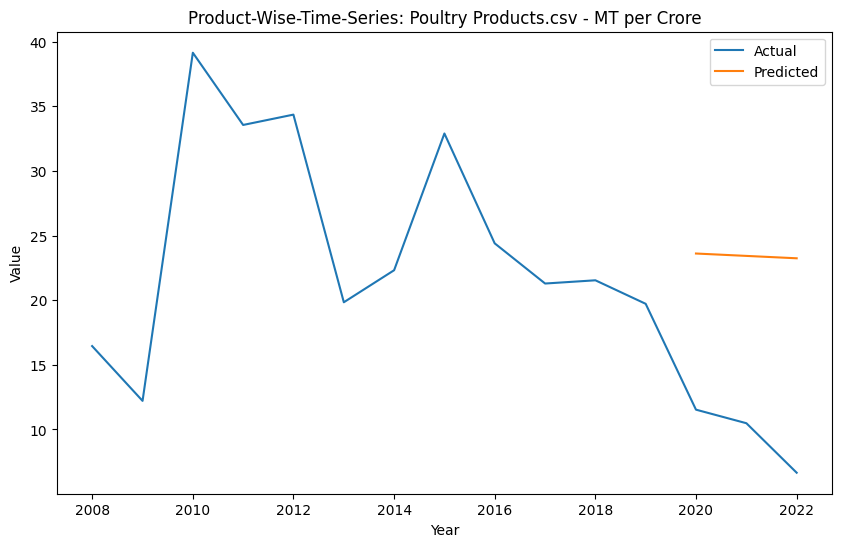

Product-Wise-Time-Series: Poultry Products.csv - MT per Crore RMSE: 14.011257683494307
Test series must contain at least 2 values.
Product-Wise-Time-Series: Prepared Animal Feeder.csv - MT per Crore not enough data for Linear Regression model


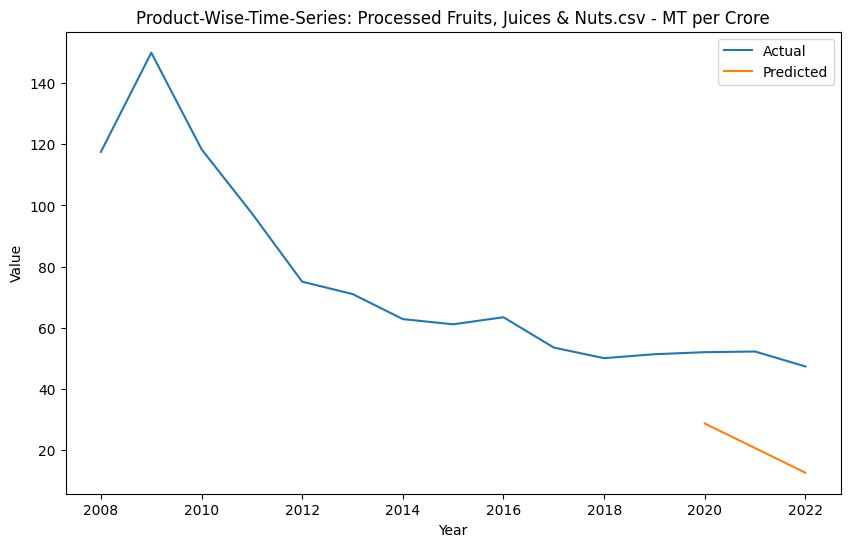

Product-Wise-Time-Series: Processed Fruits, Juices & Nuts.csv - MT per Crore RMSE: 30.26132842754691


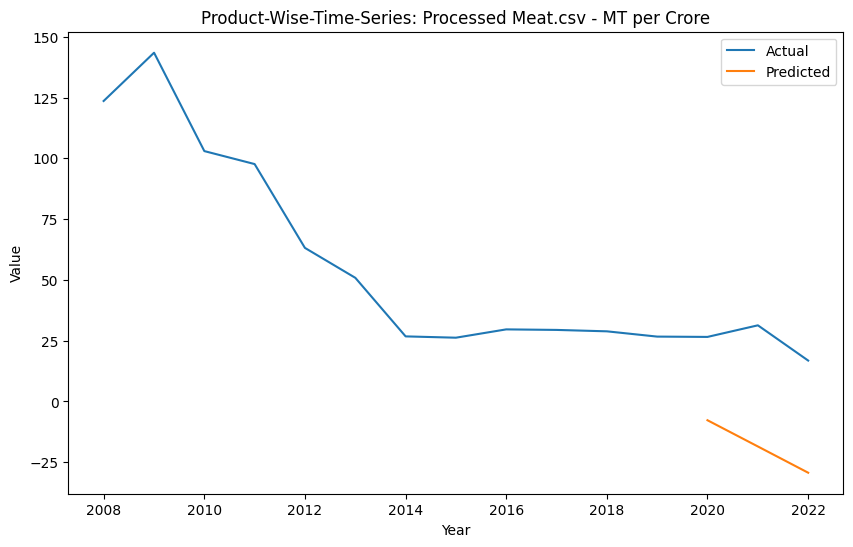

Product-Wise-Time-Series: Processed Meat.csv - MT per Crore RMSE: 43.92572071602669


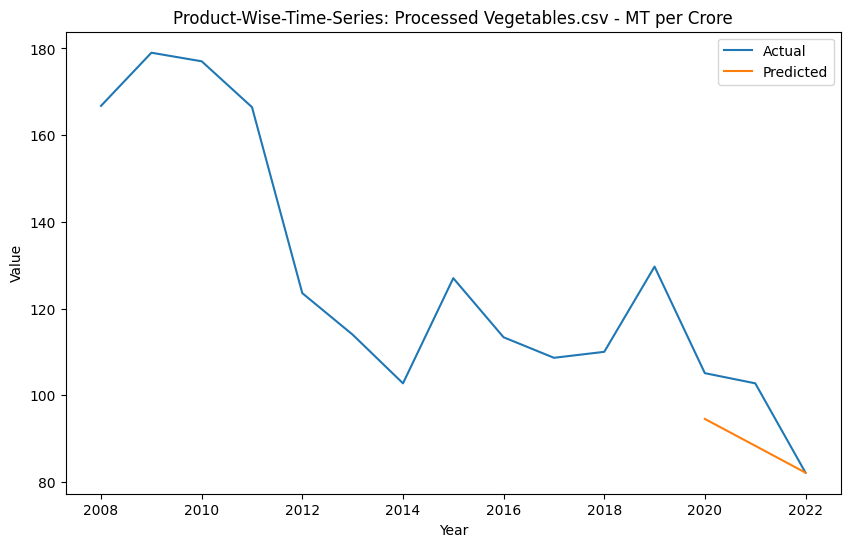

Product-Wise-Time-Series: Processed Vegetables.csv - MT per Crore RMSE: 10.315273610381501


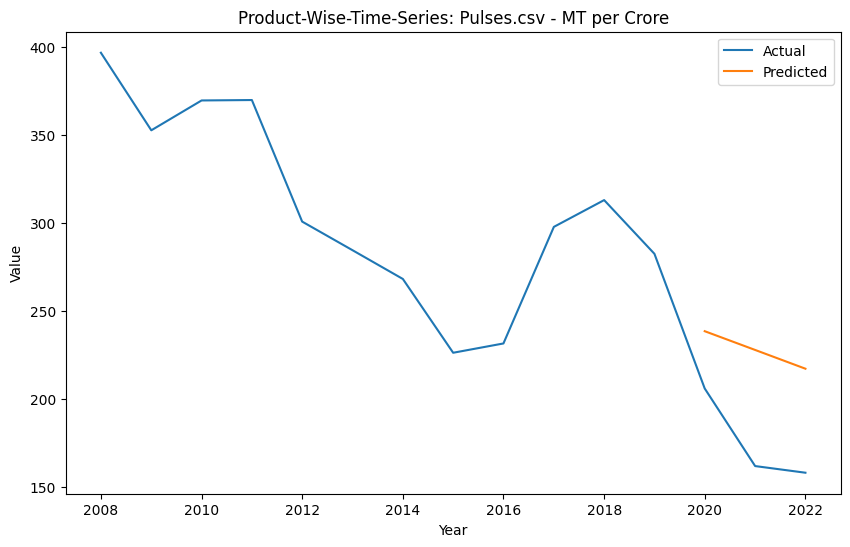

Product-Wise-Time-Series: Pulses.csv - MT per Crore RMSE: 54.48132058072447


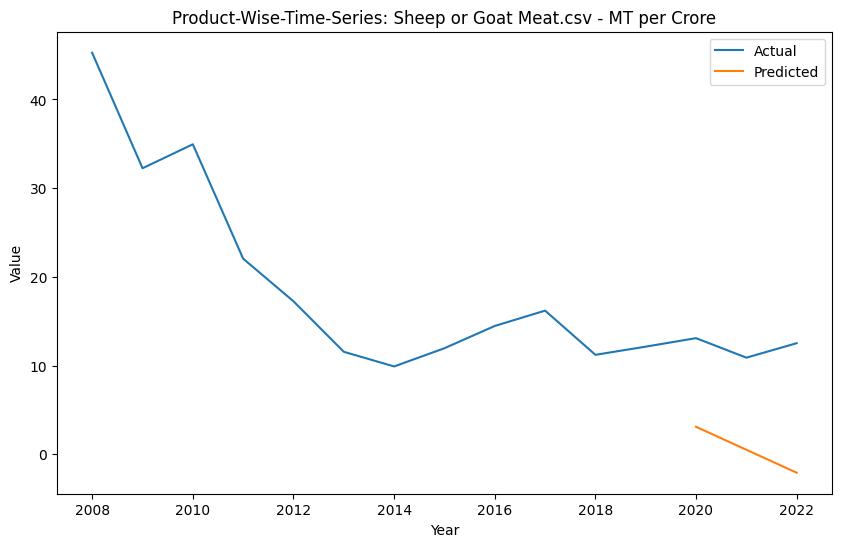

Product-Wise-Time-Series: Sheep or Goat Meat.csv - MT per Crore RMSE: 11.841844124046704


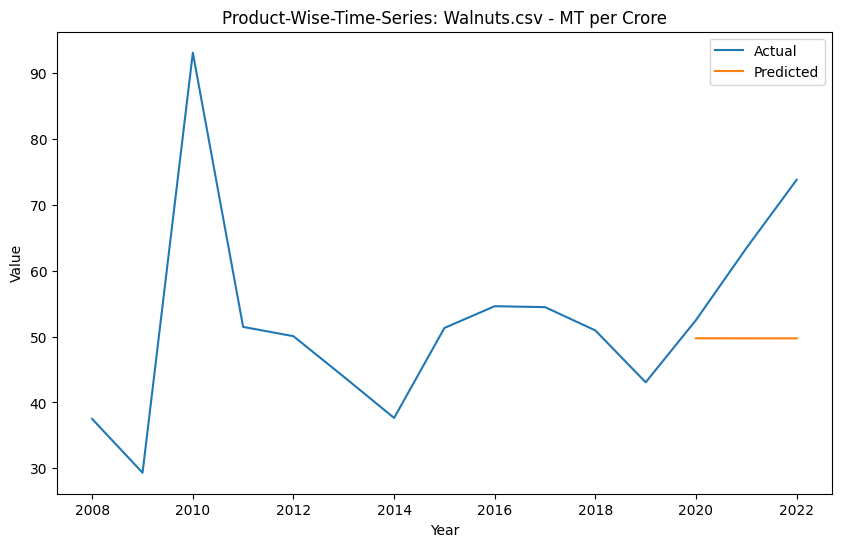

Product-Wise-Time-Series: Walnuts.csv - MT per Crore RMSE: 16.066133079173333


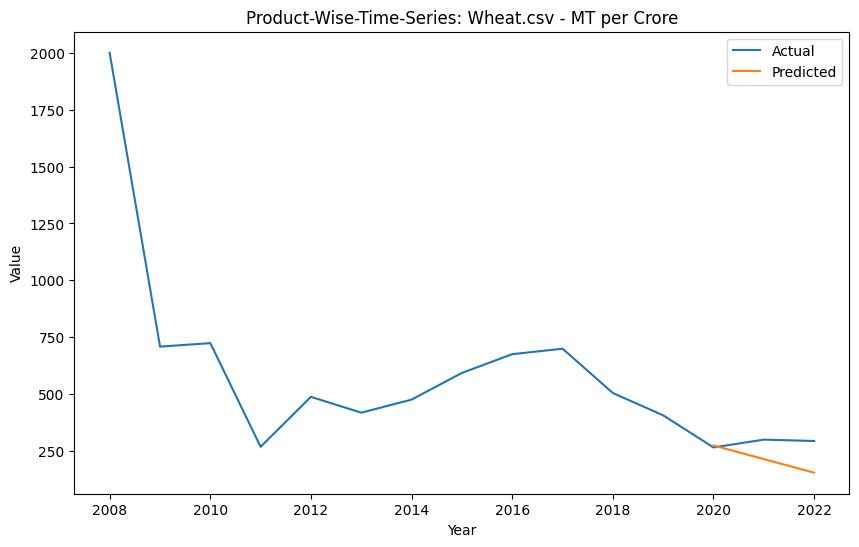

Product-Wise-Time-Series: Wheat.csv - MT per Crore RMSE: 94.53740066784594


In [6]:
# Export Prediction Product Wise

folders_to_process = ['Product-Wise-Time-Series']

for folder_name in folders_to_process:
    folder_path = os.path.join(base_dir, folder_name)
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_name}' does not exist.")
        continue
    
    print(f"Processing data in folder: {folder_name}...")
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        if 'Year' in df.columns:
            if df['Year'].iloc[-1] == 'Total':
                df = df.iloc[:-1]
                df = df.iloc[:-1]
            # Handle cases where 'Year' column contains more than just the year
            df['Year'] = df['Year'].str.extract('(\d{4})', expand=False)
            df['Year'] = pd.to_datetime(df['Year'], format='%Y')
            df.set_index('Year', inplace=True)
        df = df[df["MT per Crore"] != 0]
        
        for column in df.columns:
            if column not in ['Year', '% Share(Qty)', '% Share(Rs)', 'Qty(MT)', 'Rs(Crore)']:
                predictions, rmse = fit_linear_regression(df[column])
                if predictions is not None:
                    plot_forecast(df[column], predictions, f"{folder_name}: {file_name} - {column}")
                    print(f"{folder_name}: {file_name} - {column} RMSE: {rmse}")
                else:
                    print(f"{folder_name}: {file_name} - {column} not enough data for Linear Regression model")
